In [24]:
import pandas as pd
from sklearn import tree, preprocessing
from IPython.display import Image 
import pydotplus
%matplotlib inline

# 决策树
>本章实现了决策树 ID3 算法，进行了一个实例实战：
* 推荐隐形眼镜类型。

>本 Notebook 采用 sklearn 进行实例演示，并结合 pydotplus 可视化决策树。

**决策树算法**
* 优点：计算复杂度不高、输出结果易于理解、对中间值的缺失不敏感、可以处理不相关特征数据。
* 缺点：容易过拟合。
* 适用范围：数据型和标称型。

In [16]:
df = pd.read_table('data/ch3/lenses.txt', header=None, names=['age', 'prescript', 'astigmatic', 'tearRate', 'lense'])

In [17]:
df.head()

,age,prescript,astigmatic,tearRate,lense
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses


In [26]:
# 由于 sklearn 并不支持 categorical data 决策树，将 categorical data 转换为 numerical data
le = preprocessing.LabelEncoder()
x = df[['age', 'prescript', 'astigmatic', 'tearRate']].apply(lambda x: le.fit_transform(x))
y = le.fit_transform(df['lense'])
y

array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1])

In [22]:
# 构建决策树
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [23]:
# 训练
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

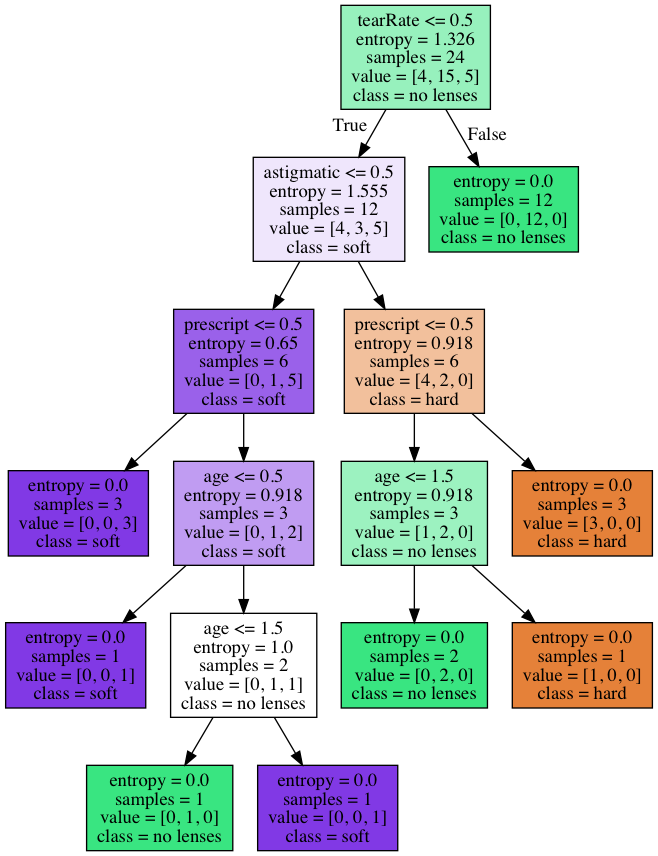

In [28]:
# 决策树可视化
# 可视化的决策树为 numerical data ，若要显示为 categorical data，可修改 dot 文件
# tree.export_graphviz(clf, out_file=output_file) 可保持 dot 文件
name = x.columns
label = ["hard","no lenses", "soft"]
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=name, class_names=label,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png('tree.png')
Image(graph.create_png())